*Tre's notebook*
# Criminal Activity Reports
### The dataset used in this notebook covers monthly reported criminal activity

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')
crim_data = pd.read_csv('criminalactivity.csv')
crim = crim_data[['ReportedDate', 'ReportedMonth', 'NIBRS_Offense_Type', 'NIBRS_Offense_Grouping', 'Zone', 'Neighborhood']]
crim.sample(1)
pop_data = pd.read_csv('population.csv')
pop = pop_data[['Neighborhood', '2020_Total_Population']]

Neighborhood
Saint Clair           25
Ridgemont             33
Chartiers             38
New Homestead         54
Swisshelm Park        66
East Carnegie         78
Esplen                79
Summer Hill           83
Oakwood               88
Regent Square         97
Hays                 107
Fairywood            108
Mount Oliver         111
Arlington Heights    123
Allegheny West       130
Glen Hazel           132
Windgap              150
Spring Garden        157
Name: count, dtype: int64

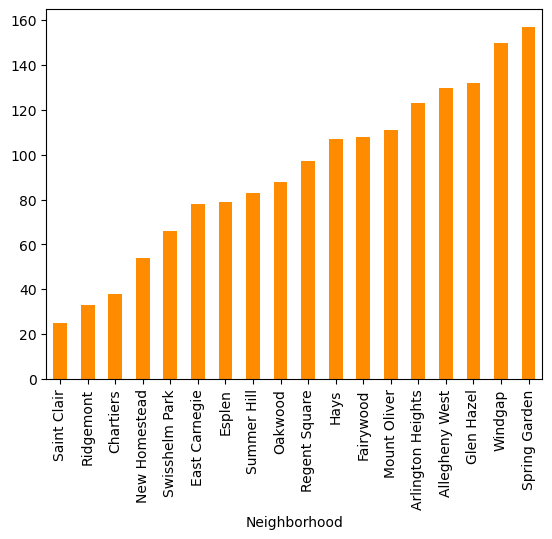

In [3]:
#establish crimes per neighborhood - get total number of neighborhoods 
crime_counts = crim['Neighborhood'].value_counts()
num_neigh = len(crime_counts)

#20% total neighborhood
bottom_20_n = int(num_neigh * 0.20)

#get bottom 20% neighborhoods
new_crim = crime_counts.sort_values().head(bottom_20_n)
new_crim.plot(kind="bar", color="darkorange")
new_crim

In [30]:
neighs = new_crim.index.tolist()
neigh_crim = crim[crim['Neighborhood'].isin(neighs)]

neigh_list = ['St. Clair', 'Ridgemont', 'Chartiers City', 'New Homestead', 'Swisshelm Park', 'East Carnegie', 'Esplen', 'Summer Hill', 'Oakwood', 'Regent Square', 'Hays', 'Fairywood', 'Mt. Oliver', 'Arlington - Arlington Heights (Combined)', 'Allegheny West', 'Glen Hazel', 'Windgap', 'Spring Garden']
pop[pop['Neighborhood'].isin(neigh_list)]

pop['Neighborhood'] = pop['Neighborhood'].str.replace('Arlington - Arlington Heights (Combined)', 'Arlington')
crim['Neighborhood'] = crim['Neighborhood'].str.replace('Saint Clair', 'St. Clair')
crim['Neighborhood'] = crim['Neighborhood'].str.replace('Mount Oliver', 'Mt. Oliver')
crim['Neighborhood'] = crim['Neighborhood'].replace('Arlington Heights', 'Arlington')
crim['Neighborhood'] = crim['Neighborhood'].replace('Chartiers', 'Chartiers City')

Neighborhood
St. Clair          25
Ridgemont          33
Chartiers City     38
New Homestead      54
Swisshelm Park     66
East Carnegie      78
Esplen             79
Summer Hill        83
Oakwood            88
Regent Square      97
Hays              107
Fairywood         108
Mt. Oliver        111
Allegheny West    130
Glen Hazel        132
Windgap           150
Spring Garden     157
Morningside       200
Name: count, dtype: int64

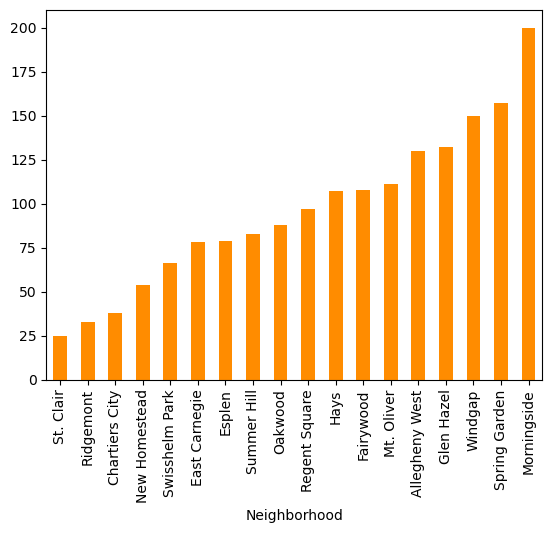

In [33]:
crime_counts = crim['Neighborhood'].value_counts()
num_neigh = len(crime_counts)

#20% total neighborhood
bottom_20_n = int(num_neigh * 0.20)

#get bottom 20% neighborhoods
new_crim = crime_counts.sort_values().head(bottom_20_n)
new_crim.plot(kind="bar", color="darkorange")
new_crim

In [69]:
bottom_20 = crime_counts.sort_values().head(bottom_20_n).reset_index()
bottom_20.columns = ['Neighborhood', 'CrimeCount']
df = bottom_20.merge(pop,
                     on='Neighborhood',
                     how='left')
df['CrimeRate'] = df['CrimeCount'] / df['2020_Total_Population']

In [70]:
df

,Neighborhood,CrimeCount,2020_Total_Population,CrimeRate
0,St. Clair,25,183,0.136612
1,Ridgemont,33,390,0.084615
2,Chartiers City,38,492,0.077236
3,New Homestead,54,917,0.058888
4,Swisshelm Park,66,1339,0.049291
5,East Carnegie,78,491,0.158859
6,Esplen,79,322,0.245342
7,Summer Hill,83,998,0.083166
8,Oakwood,88,1025,0.085854
9,Regent Square,97,971,0.099897


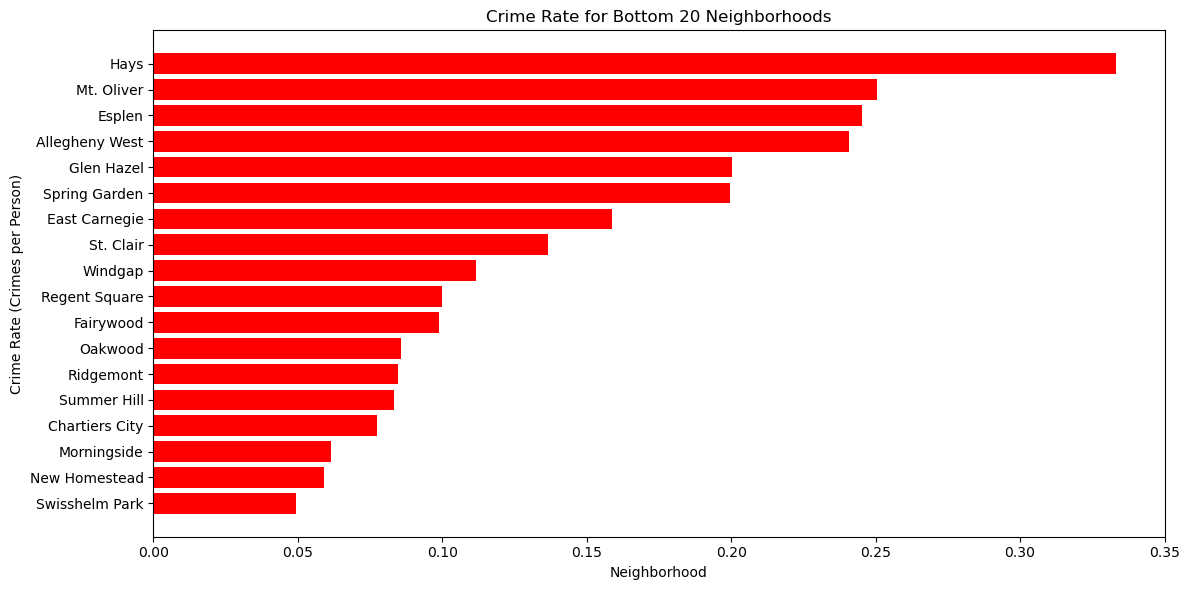

In [71]:

df_sorted = df.sort_values('CrimeRate')
plt.figure(figsize=(12,6))

plt.barh(df_sorted['Neighborhood'], df_sorted['CrimeRate'], color="red")


plt.xlabel('Neighborhood')
plt.ylabel('Crime Rate (Crimes per Person)')
plt.title('Crime Rate for Bottom 20 Neighborhoods')

plt.tight_layout()
plt.show()

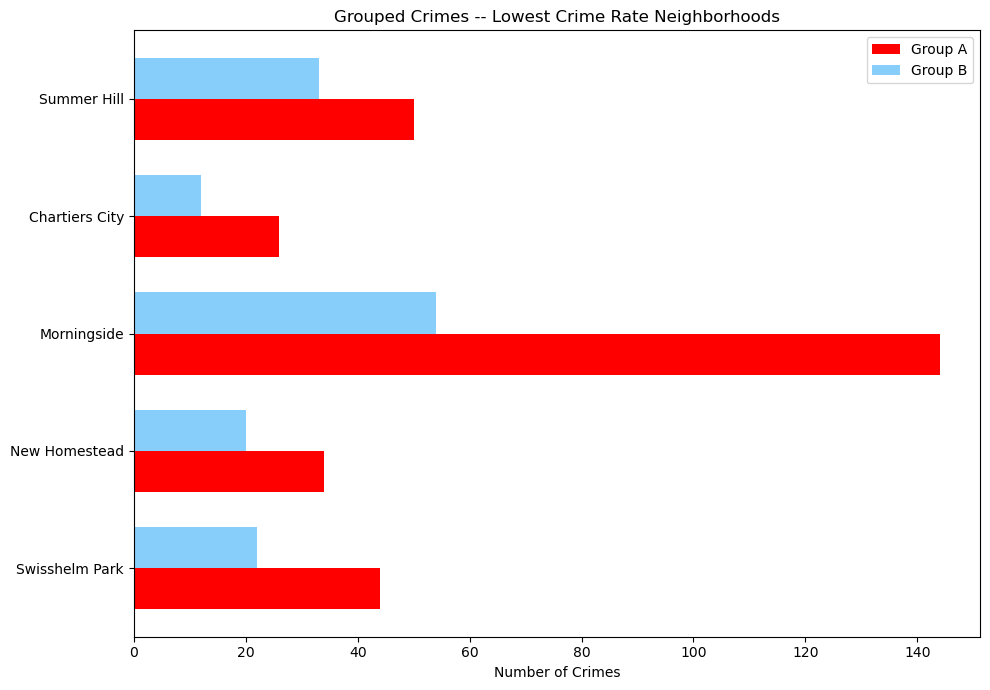

In [74]:
lowest5 = df.sort_values('CrimeRate').head(5)
bottom_list = lowest5["Neighborhood"].tolist()

A = crim[(crim['NIBRS_Offense_Grouping'] == 'A') &
         (crim['Neighborhood'].isin(bottom_list))]

B = crim[(crim['NIBRS_Offense_Grouping'] == 'B') &
         (crim['Neighborhood'].isin(bottom_list))]

A_count = A['Neighborhood'].value_counts()
B_count = B['Neighborhood'].value_counts()

combined = (
    A_count.rename('A')
    .to_frame()
    .join(B_count.rename('B'), how='outer')
    .fillna(0)
    .loc[bottom_list] 
)

neighborhoods = combined.index
y = np.arange(len(neighborhoods))
height = 0.35

plt.figure(figsize=(10, 7))

plt.barh(y - height/2, combined['A'], height=height, label='Group A', color='red')
plt.barh(y + height/2, combined['B'], height=height, label='Group B', color='lightskyblue')

plt.yticks(y, neighborhoods)
plt.xlabel("Number of Crimes")
plt.title("Grouped Crimes -- Lowest Crime Rate Neighborhoods")
plt.legend()
plt.tight_layout()
plt.show()

### TOP 3 Winners

1. **Swisshelm Park**
2. **Chartiers City**
3. **New HomeStead**